### Estuardo J. Díaz García
-----
# Laboratorio 3. Plantas. Parte 2

## Clasificación de plantas

In [17]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb
from sklearn.metrics import classification_report

In [18]:
df_plants = pd.read_table("iris.data",sep=",",names=["sepal_length", "sepal_width", "petal_length", "petal width","class"])
df_plants.head(10)

,sepal_length,sepal_width,petal_length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [19]:
df_plants.describe()

,sepal_length,sepal_width,petal_length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


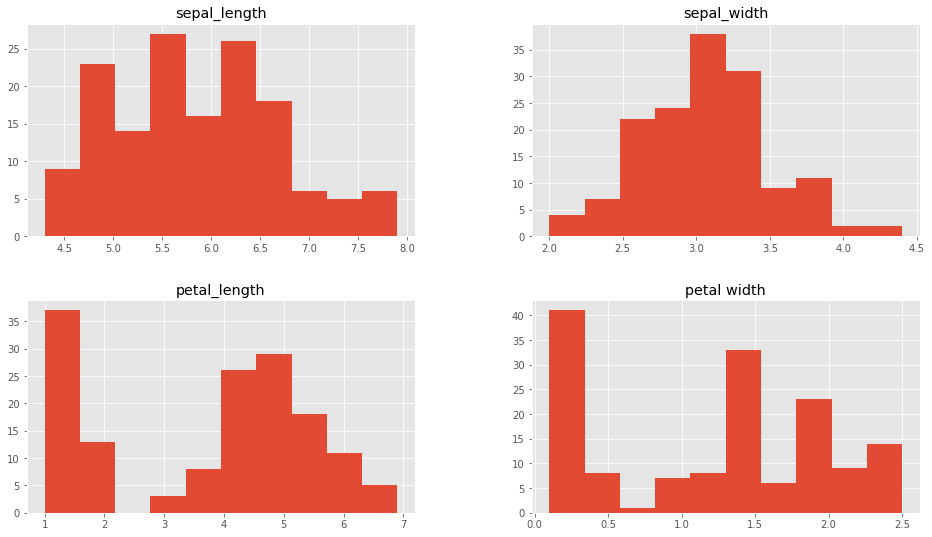

In [20]:
df_plants.hist()
plt.show()

In [21]:
print(df_plants.groupby("class").size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [22]:
x = df_plants[["sepal_length","sepal_width","petal_length","petal width"]]
y = df_plants["class"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=4)
print(x_train.shape)
print(x_test.shape)

(120, 4)
(30, 4)


In [23]:
print(y_train.shape)
print(y_test.shape)

(120,)
(30,)


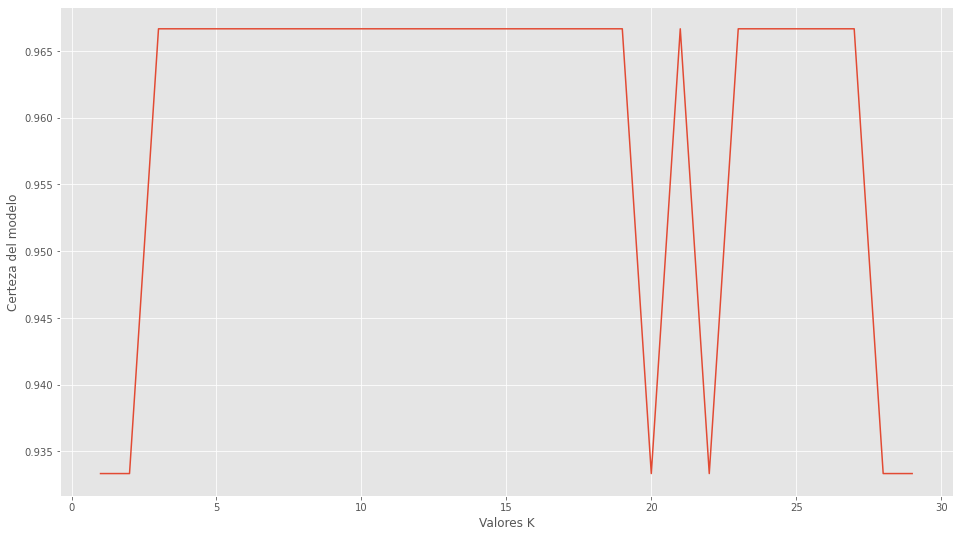

[0.9333333333333333, 0.9333333333333333, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9333333333333333, 0.9666666666666667, 0.9333333333333333, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9333333333333333, 0.9333333333333333]


In [24]:
k_range = range(1,30)
certeza = {}
certeza_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
    y_hat = knn.predict(x_test)
    certeza[k] = metrics.accuracy_score(y_test,y_hat)
    certeza_list.append(metrics.accuracy_score(y_test,y_hat))
    
plt.plot(k_range,certeza_list)
plt.xlabel("Valores K")
plt.ylabel("Certeza del modelo")
plt.show()

print(certeza_list)
#Vemos que la certeza el modelo llega por encima del 96.6% entre los k's 3 al 19, luego cae y se mantiene errático.

In [25]:
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat))
#Vemos que el f1-score de certeza está en 0.93, bastante bueno. Y la matriz de confusión indica que solo 2 de 32 observaciones
#fueron categorizadas incorrectamente

[[16  0  0]
 [ 0  4  1]
 [ 0  1  8]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.80      0.80      0.80         5
 Iris-virginica       0.89      0.89      0.89         9

       accuracy                           0.93        30
      macro avg       0.90      0.90      0.90        30
   weighted avg       0.93      0.93      0.93        30



## Modelo final
-----

In [26]:
prediccion_flores = KNeighborsClassifier(n_neighbors = 3).fit(x,y)

In [27]:
#hacemos algunas predicciones
classes = {0:"Iris-setosa ",1:"Iris-versicolor",2:"Iris-virginica"}

#"sepal_length", "sepal_width", "petal_length", "petal width"
x_nueva = [[1,1,1,1],[3.2,4.6,6.1,7.8]]
y_hat_nueva = prediccion_flores.predict(x_nueva)
print(y_hat_nueva)

['Iris-setosa' 'Iris-virginica']
